In [1]:
# Imports
import kagglehub
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Ftrl, SGD
from tensorflow.keras.regularizers import l2, l1_l2, l1
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data
path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")
df = pd.read_csv(f"{path}/water_potability.csv")

100%|██████████| 251k/251k [00:00<00:00, 66.5MB/s]

Extracting files...


In [3]:
# 2. Handle missing values with (mean imputation)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [4]:
# 3. Split features and target
X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

In [5]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=72)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
def model_dean():
    model = Sequential([
    Dense(64, activation='relu', input_shape=(9,), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=0.01, momentum=0.9)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.682, Test: 0.683
[0.5791984796524048, 0.6111640930175781, 0.614980936050415, 0.6316794157028198, 0.6459923386573792, 0.6517175436019897, 0.6693702340126038, 0.6736640930175781, 0.6746183037757874, 0.6793892979621887, 0.6817747950553894, 0.6841602921485901, 0.6846374273300171, 0.6846374273300171, 0.6784350872039795, 0.6808205842971802, 0.6879770755767822, 0.6841602921485901, 0.6860687136650085, 0.6851145029067993, 0.6903625726699829, 0.6779580116271973, 0.6760495901107788, 0.6827290058135986, 0.6836832165718079, 0.6746183037757874, 0.6812977194786072, 0.6741412281990051, 0.6836832165718079, 0.6722328066825867, 0.6789122223854065]


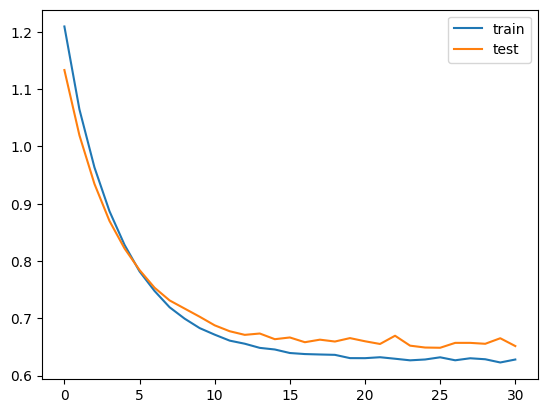

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.6829
F1 Score: 0.4378
Precision: 0.7105
Recall: 0.3164


In [8]:

# Reuse this codeif necessary
#fit model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


model = model_dean()
history = model.fit(
    X_train_scaled, y_train,
    epochs=4000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es],
    verbose=0
)
# evaluate the model
_, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
print(history.history['accuracy'])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = (y_pred_nn > 0.5).astype(int)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
# summary viewer
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")